<a href="https://colab.research.google.com/github/GusBarcenac/Simulacion2-Examen-1/blob/main/ejercicio25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EJERCICIO 25**

Un quiosquero vende periódicos a 1.10 euros cada uno. Cada periódico le cuesta al quiosquero 0.90 euros. Las ventas de periódicos del quiosquero a partir de su experiencia se refleja en la tabla siguiente.

Periodicos = | 30 , 40 , 50 , 60 , 70 |

---

 f(x) =      | 20% ,   25% ,   25%  ,  20%  ,  %70  |

La tabla recoge por ejemplo que el 20% del tiempo las ventas han sido de 30 periódicos.
Teniendo en cuenta el coste de 0,20 euros por venta perdida y el coste de 0,10 euros por el reciclaje de cada periódico no vendido, determine el beneficio promedio diario si pide 50 periódicos cada día.


**SOLUCION:**

1.La variable es determinada por el número de periodicos vendidos.

2.La distribución se obtiene a partir de los datos historicos.

3.La distribución enumerada es:[0.20], [0.20+0.25=0.45], [0.45+0.25=0.70], [0.70+0.20=0.90], [0.90+ 0.10=1]

F(x)= [0.20, 0.45, 0.70, 0.90, 1]

4.Intervalos generados: [0 a 0.19], [0.20 a 0.44], [0.45 a 0.69], [0.70 a 0.89] [0.90 a 1]

5.Generación de números aleatorios x1 ~ U(0,1)




In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
pedido=50 #cantidad de periódico solicitado.
puv=1.10 #Precio unitario de venta.
cua=0.90 #Costo unitario de adquisicón.
cur=0.10 # Costo unitario de reciclaje.
cvp=0.20 # Costo de venta perdida.
bp=0 # beneficio promedio.

In [60]:

def bene():#La función bene es lo que nos dara el beneficio por un día.
    va=round(random.uniform(0, 1),4) #Regresa una v.a con distribución uniforme entre 0 y 1 redondeado a 4 digitos decimales.
    
    if 0<=va and va<0.20 :#Se crea una lista de ciclo's if para generar la simulación de ventas de periodicos.
        ventassimu=30
      
    if 0.20<=va and va<0.45 :
        ventassimu=40
      
    if 0.45<=va and va<0.70 :
        ventassimu=50
      

    if 0.70<=va and va<0.90 :
        ventassimu=60
      

    if 0.90<=va and va<1 :
        ventassimu=70
      
    
    if pedido < ventassimu :
        ventasreales=pedido
        ventasperdidas=ventassimu-pedido
        periodicosnov=0
        

    if pedido >= ventassimu :
        ventasreales=ventassimu
        ventasperdidas=0
        periodicosnov=pedido-ventasreales
        
    #print("ventas simuladas:",ventassimu,"ventas reales:",ventasreales,"ventas perdidas:",ventasperdidas,"Periodicos no vendidos:",periodicosnov)
    Beneficio=(puv*ventasreales)-(cua*pedido)-(cur*periodicosnov)-(cvp*ventasperdidas)
    
    return Beneficio #Nos arroja el beneficio
   

In [73]:
bene() #beneficio por día

-10.8

In [75]:
def proba(n):                    
    prob = []# Esta funcion devuelve esta lista "prob", arroja el beneficio promedio
    bp = 0# seria la suma de los beneficios entre la cantidad de veces realizado la simulación. 
    for i in range(n):              
        bp= (bp + bene() )
        bpa=bp/(i+1)#print(i,"Beneficio promedio:",bpa)
        prob.append(round(bpa,5))#Agregamos el beneficio promedio introducido a la lista
                    
    return prob

In [76]:
X = proba(1000)#esto sería hacer un experimento.

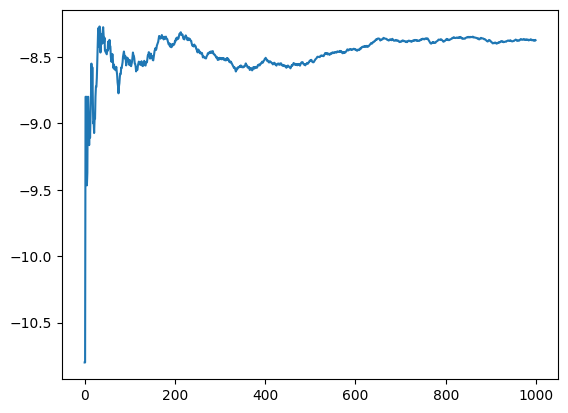

In [77]:
plt.plot(X)#graficamos 

In [78]:
print(np.mean(X), np.std(X))#imprimimos las 

-8.46413506 0.15546113300306416


6.Repetimos **n** veces el experimento:

In [80]:
def beneficiodia(n):#con esta función se realiza n veces el experimento.
    lista=[]
    for i in range(n):
        X = proba(1000)  
        s = np.mean(X)
        lista.append(np.mean(s))
    return lista

In [81]:
Y=beneficiodia(20)

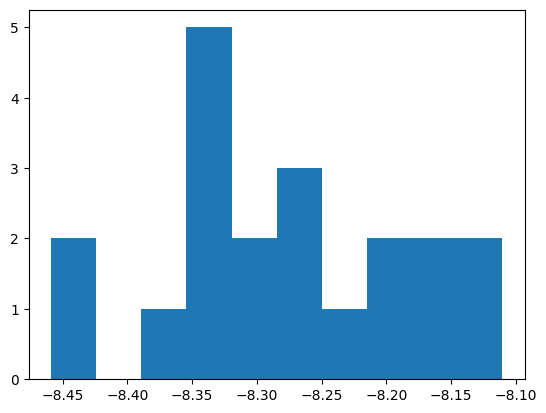

In [82]:
plt.hist(Y)
plt.show()

In [88]:
print("el beneficio promedio es:",np.mean(Y),"desviación estandar:", np.std(Y)) # + ganancia & - perdida

el beneficio promedio es: -8.280765789000002 desviación estandar: 0.09729297423023953


7.Determinamos el intervalo de confiaza:

In [89]:
li=np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50)
ls=np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)
if li <= np.mean(Y) <= ls:
    print(li, "<= Media:", np.mean(Y), "<=", ls) 
    print("Se acepta la hipótesis con un nivel de confiabilidad del 95%")
    
    

-8.307734025561286 <= Media: -8.280765789000002 <= -8.253797552438717
Se acepta la hipótesis con un nivel de confiabilidad del 95%


8.El pedido de periodicos que maximiza la función tiene que ser un pedido entre [ 0 , 70 ] de la fución de beneficio promedio,en vez de pedir 50 periodicos.

In [90]:
lista2=[] #Con está lista, se tendra el beneficio de pedir de 0 hasta 70 periodicos.
for i in range(71):
    pedido=i
    bene()
    X = proba(1000)  
    w=np.mean(X)
    lista2.append(np.mean(w))
    
plt.hist(lista2) 

UnboundLocalError: ignored

In [87]:
max_value = None 
for num in lista2:
    if (max_value is None or num > max_value): #La función max_value nos da el valor maximo de una lista.
        max_value = num

print("Pedir",i, "periodicos para obtener la maxima ganancia de:", max_value,)

Pedir 70 periodicos para obtener la maxima ganancia de: 3.64370623
